In [1]:
!pip install onnx onnxruntime pydantic==1.10.16 huggingface-hub pyyaml
!pip install --no-deps open-iris

  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 72.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.7 MB/s eta 0:00:00
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using c

In [2]:
import iris

print(iris.__version__)

1.9.7


/mnt/oldhome/nishkal/dd/iris-code/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


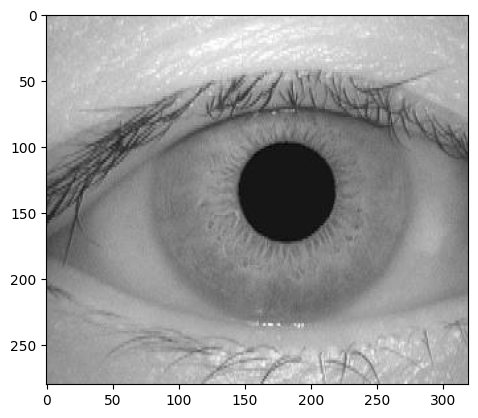

In [3]:
import cv2
import matplotlib.pyplot as plt

img_pixels = cv2.imread("./001_1_1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pixels, cmap='gray')

In [4]:
iris_pipeline = iris.IRISPipeline()

# Options for the `eye_side` argument are: ["left", "right"]
output = iris_pipeline(iris.IRImage(img_data=img_pixels, image_id="image_id", eye_side="right"))
output = iris_pipeline.run(iris.IRImage(img_data=img_pixels, image_id="image_id", eye_side="right"))
output = iris_pipeline.estimate(iris.IRImage(img_data=img_pixels, image_id="image_id", eye_side="right"))

In [19]:
output = iris_pipeline(iris.IRImage(img_data=img_pixels, image_id="001", eye_side="left"))

In [20]:
print(output.keys())
output["error"] is None

dict_keys(['error', 'iris_template', 'metadata'])


True

In [21]:
"""Available fields in `output["iris_template"]` are: """ + str(output["iris_template"].__fields__)

'Available fields in `output["iris_template"]` are: {\'iris_codes\': ModelField(name=\'iris_codes\', type=List[ndarray], required=True), \'mask_codes\': ModelField(name=\'mask_codes\', type=List[ndarray], required=True), \'iris_code_version\': ModelField(name=\'iris_code_version\', type=str, required=True)}'

In [22]:
num_codes = len(output["iris_template"].iris_codes)
code_shape = output["iris_template"].iris_codes[0].shape

f"""Number of returned iris codes is equal to {num_codes} and each code shape is {code_shape}"""

'Number of returned iris codes is equal to 2 and each code shape is (16, 256, 2)'

In [23]:
output["metadata"]

{'iris_version': '1.9.7',
 'image_id': '001',
 'image_size': (320, 280),
 'eye_side': 'left',
 'eye_centers': {'iris_center': (177.48051808205966, 137.2971728148795),
  'pupil_center': (181.9474254533036, 134.71627822012692)},
 'pupil_to_iris_property': {'pupil_to_iris_diameter_ratio': 0.3878222863041983,
  'pupil_to_iris_center_dist_ratio': np.float64(0.05217582718863598)},
 'offgaze_score': 3.73082000888141e-05,
 'eye_orientation': np.float64(-0.055496199848637406),
 'occlusion90': np.float64(0.8218605004944094),
 'occlusion30': np.float64(0.9825064726051361),
 'iris_bbox': {'x_min': 79.08786010742188,
  'y_min': 38.76966857910156,
  'x_max': 276.2251281738281,
  'y_max': 235.930908203125},
 'sharpness_score': 1681.1151123046875}

## Debug Environment

In [24]:
iris_pipeline = iris.IRISPipeline(env=iris.IRISPipeline.DEBUGGING_ENVIRONMENT)

output = iris_pipeline(iris.IRImage(img_data=img_pixels, image_id="001", eye_side="left"))

In [25]:
output.keys()

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])

In [26]:
iris_visualizer = iris.visualisation.IRISVisualizer()

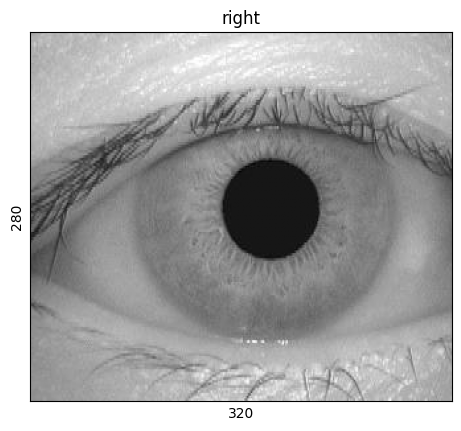

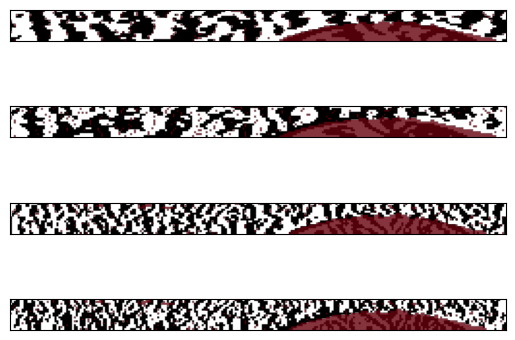

In [27]:
import matplotlib.pyplot as plt

canvas = iris_visualizer.plot_ir_image(iris.IRImage(img_data=img_pixels, eye_side="right"))
plt.show()

canvas = iris_visualizer.plot_iris_template(output["iris_template"])
plt.show()

In [28]:
output['metadata']['eye_side']

'left'

In [29]:
iris_pipeline.params.pipeline

[PipelineNode(name='segmentation', algorithm=PipelineClass(class_name='iris.MultilabelSegmentation.create_from_hugging_face', params={'denoise': True}), inputs=[PipelineInput(name='image', index=None, source_node='input')], callbacks=None, seed=None),
 PipelineNode(name='segmentation_binarization', algorithm=PipelineClass(class_name='iris.MultilabelSegmentationBinarization', params={}), inputs=[PipelineInput(name='segmentation_map', index=None, source_node='segmentation')], callbacks=None, seed=None),
 PipelineNode(name='vectorization', algorithm=PipelineClass(class_name='iris.ContouringAlgorithm', params={}), inputs=[PipelineInput(name='geometry_mask', index=0, source_node='segmentation_binarization')], callbacks=None, seed=None),
 PipelineNode(name='specular_reflection_detection', algorithm=PipelineClass(class_name='iris.SpecularReflectionDetection', params={}), inputs=[PipelineInput(name='ir_image', index=None, source_node='input')], callbacks=None, seed=None),
 PipelineNode(name='i

In [30]:
iris_pipeline.call_trace['segmentation']

SegmentationMap(predictions=array([[[5.9604645e-08, 3.2782555e-07, 8.9406967e-08, 1.8477440e-06],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.9802322e-08],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.9802322e-08],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.000000

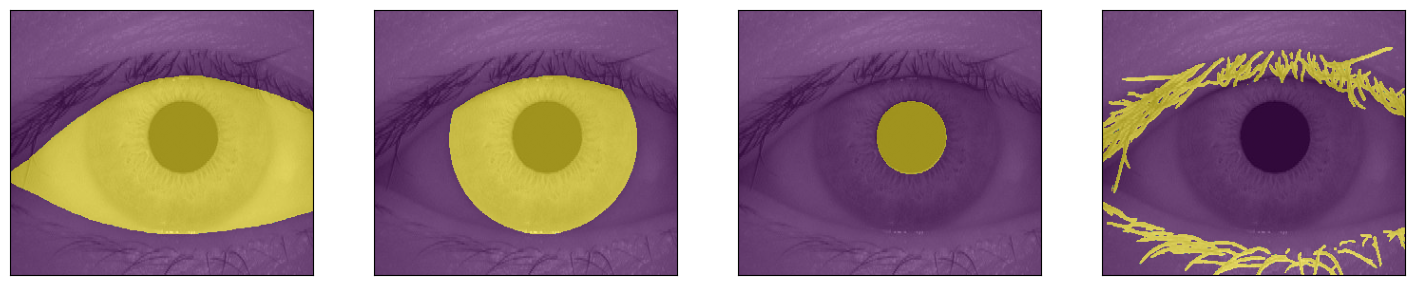

In [31]:
canvas = iris_visualizer.plot_segmentation_map(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    segmap=iris_pipeline.call_trace['segmentation'],
)
plt.show()